### Importing the libraries


In [52]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping
tf.__version__

'2.10.1'

In [53]:
print("Num GPUs Available: ", len(
    tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Preprocessing Data


In [54]:

# Define the ImageDataGenerator for training with a validation split
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # 20% for validation

# Create the training set using the subset 'training'
training_set = train_datagen.flow_from_directory('tomato/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 shuffle=True,
                                                 class_mode='categorical',
                                                 subset='training')

# Create the validation set using the subset 'validation'
val_set = train_datagen.flow_from_directory('tomato/train',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode='categorical',
                                            subset='validation')

# Create the test set using the 'val' folder
test_datagen = ImageDataGenerator(rescale=1/255.0,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_set = test_datagen.flow_from_directory('tomato/val',
                                           target_size=(224, 224),
                                           batch_size=32,
                                           shuffle=False,
                                           class_mode='categorical')

# Calculate steps per epoch based on the length of the training set
steps_per_epoch = len(training_set)

# Calculate validation steps based on the length of the validation set
validation_steps = len(val_set)



Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


### Buidling the CNN


In [55]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, kernel_size=(
    3, 3), activation='relu', input_shape=[224, 224, 3])),
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))),

cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')),
cnn.add(tf.keras.layers. MaxPooling2D((2, 2))),

cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')),
cnn.add(tf.keras.layers.MaxPooling2D((2, 2))),

cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')),
cnn.add(tf.keras.layers.MaxPooling2D((2, 2))),

cnn.add(tf.keras.layers. Conv2D(64, (3, 3), activation='relu')),
cnn.add(tf.keras.layers.MaxPooling2D((2, 2))),

cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')),
cnn.add(tf.keras.layers.MaxPooling2D((2, 2))),

cnn.add(tf.keras.layers.Flatten()),

cnn.add(tf.keras.layers.Dense(64, activation='relu'))
# output layer
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [56]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 64)      

### Compiling the CNN


In [57]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [58]:
cnn.compile(optimizer=opt, loss='categorical_crossentropy',
            metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set


In [59]:
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=20,
                   verbose=1,
                   restore_best_weights=True)

In [60]:
history = cnn.fit(x=training_set,
                  callbacks=[es],
                  steps_per_epoch=steps_per_epoch,
                  epochs=30,
                  validation_steps=validation_steps,
                  validation_data=val_set)

Epoch 1/30


250/250 [==============================] - 73s 290ms/step - loss: 2.1641 - accuracy: 0.1835 - val_loss: 1.7625 - val_accuracy: 0.3700
Epoch 2/30
250/250 [==============================] - 64s 255ms/step - loss: 1.5837 - accuracy: 0.4349 - val_loss: 1.3713 - val_accuracy: 0.4960
Epoch 3/30
250/250 [==============================] - 64s 254ms/step - loss: 1.1927 - accuracy: 0.5750 - val_loss: 0.9944 - val_accuracy: 0.6315
Epoch 4/30
250/250 [==============================] - 63s 251ms/step - loss: 0.8624 - accuracy: 0.6944 - val_loss: 0.7218 - val_accuracy: 0.7325
Epoch 5/30
250/250 [==============================] - 64s 254ms/step - loss: 0.6824 - accuracy: 0.7574 - val_loss: 0.5557 - val_accuracy: 0.8010
Epoch 6/30
250/250 [==============================] - 63s 250ms/step - loss: 0.5581 - accuracy: 0.8045 - val_loss: 0.5929 - val_accuracy: 0.7775
Epoch 7/30
250/250 [==============================] - 64s 255ms/step - loss: 0.5092 - accuracy: 0.8217 - val_loss: 0.6161 - val_accuracy: 0.7

### Evaluating the Model

In [61]:
# Evaluate the model on the test set
evaluation = cnn.evaluate(test_set)

# Extracting metrics names and values
metrics_names = cnn.metrics_names
metrics_values = evaluation

# Displaying the performance metrics
for name, value in zip(metrics_names, metrics_values):
    print(f'{name}: {value}')

32/32 [==============================] - 12s 371ms/step - loss: 0.3774 - accuracy: 0.8960
loss: 0.37744593620300293
accuracy: 0.8960000276565552


32/32 [==============================] - 7s 200ms/step
Overall Accuracy: 0.89
Overall Precision: 0.90
Overall F1 Score: 0.89


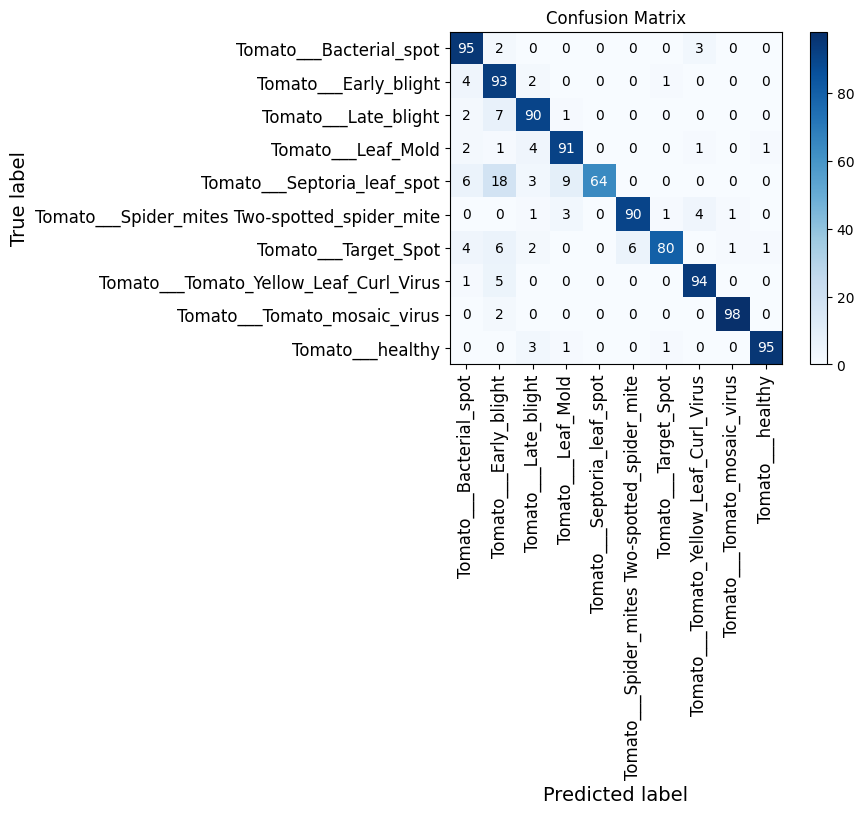

In [62]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predictions for the test set
y_true = test_set.classes
y_pred = np.argmax(cnn.predict(test_set), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display overall accuracy, precision, and F1 score
report = classification_report(y_true, y_pred, output_dict=True)
overall_accuracy = report['accuracy']
overall_precision = report['weighted avg']['precision']
overall_f1_score = report['weighted avg']['f1-score']

print(f"Overall Accuracy: {overall_accuracy:.2f}")
print(f"Overall Precision: {overall_precision:.2f}")
print(f"Overall F1 Score: {overall_f1_score:.2f}")

# Set the figure size
plt.figure(figsize=(10, 8))

# Display the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Label the axes
classes = list(test_set.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)

# Display the numbers in each cell with better contrast
thresh = cm.max() / 2.
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{cm[i, j]:.0f}", ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=10)

# Improve layout
plt.tight_layout()

# Label the axes more explicitly
plt.ylabel("True label", fontsize=14)
plt.xlabel("Predicted label", fontsize=14)

# Show plot
plt.show()

### Plot training history


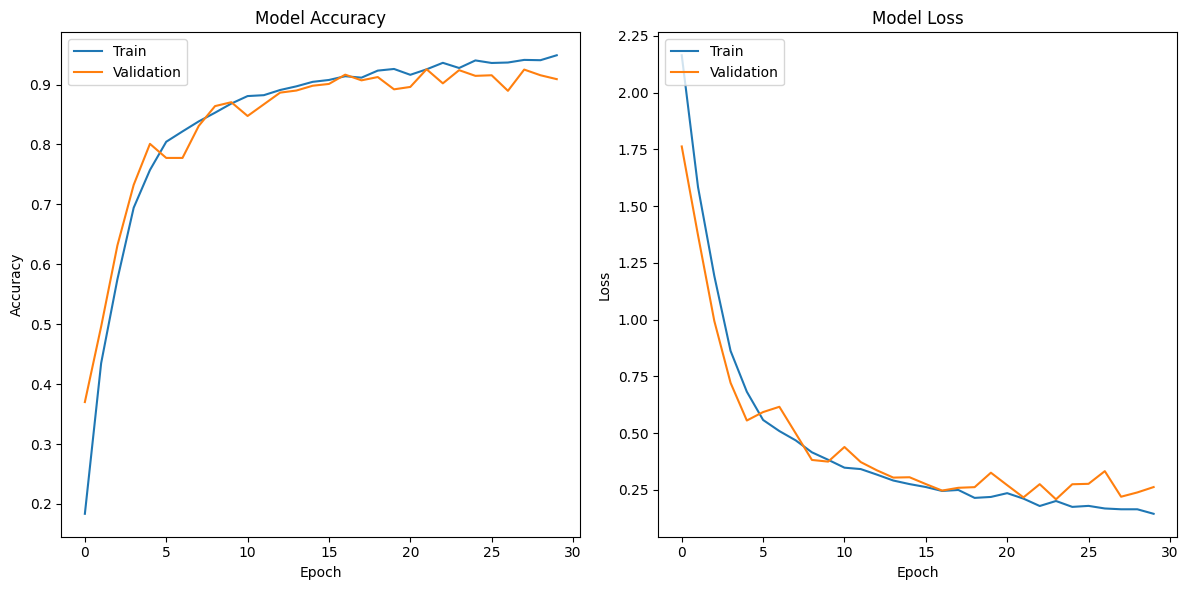

In [63]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

### Making a single prediction


In [74]:
import numpy as np
from keras.utils import load_img, img_to_array

# Load the test image
test_image = load_img('tomato/test-targetspot.JPG', target_size=( 224, 224, 3))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class probabilities
result = cnn.predict(test_image)

# Get the class indices from the training set
class_indices = training_set.class_indices

# Convert the class probabilities to the predicted class label
predicted_class_index = np.argmax(result)
predicted_class = [class_label for class_label,
                   index in class_indices.items() if index == predicted_class_index][0]

print(f"The predicted class is: {predicted_class}")

1/1 [==============================] - 0s 31ms/step
The predicted class is: Tomato___healthy
